##**The Task for the AI**


Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.



##Prequisite Python Modules
First some software needs to be loaded into the Python environment.

**Step 1**: Importing library

1. **(from keras.datasets import mnist)** ===> The **keras.datasets** module provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model.Here we are importing the **MNIST** dataset it was include in the keras API.

2. **(from keras.models import Sequential)** ===> The core idea of Sequential API is simply **arranging the Keras layers in a sequential order** and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

3. **layers.core**(API) ===> Layers are the basic building blocks of neural networks in Keras. 

4. **Type of the layers**
      *  **Dense** --->  Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer.
      *  **Dropout** ---> A technique where randomly selected neurons are ignored during training.it will randomly set the input units is 0  with a frequency of rate at each step during training time, which helps prevent overfitting.
      *   **Activation** --->  Activation functions are a critical part of the design of a neural network.(increase the non-linearity in the output.)

5.  **(from keras.utils import np_utils)** ===> Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. 




In [1]:
import numpy as np            # advanced math library
import matplotlib.pyplot as plt   # MATLAB like plotting 
import random                     # for generating random numbers

from keras.datasets import mnist  # MNIST dataset is included in Keras
from keras.models import Sequential     # Model type to be used

from keras.layers.core import Dense, Dropout, Activation  # Types of layers t be used in the model
from keras.utils import np_utils

**Step 2:** Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [2]:
# The MNIST data is split between 60,000 image (28 X 28 px)
# training images and 10,000 images (28 x 28 px)

(X_train, y_train), (X_test,y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


**Step 3:** Using matplotlib , we can plot some sample images from the training set directly into this google colab notebook.

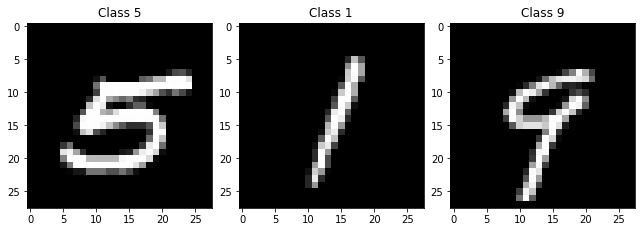

In [3]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(3):                     #(rcParams)Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

**Step 4:** Let's examine a single digit a little closer, and print out the array.

In [4]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0   10   67  129  248  177   72  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0   19  108  192  230  238  241  232  216  109  0 

Each pixel is a 8-bit integer from 0-255. 0 is full black while 255 is full white. This what we call a single-channel pixel it's called monochrome.


Formatting the input datra layer instead of 28 x 28 matrix, we build our network to accept 


# **Formatting the input data layer**


**Step 5:** 

1. Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.Each image needs to be then reshaped (or flattened) into a vector.

2. (Reshaping) ===> Most of the neural networks are designed that can only accept images of a fixed size. So overcome this problem To reshape the input images so that they can be fed into the networks.(2d-->1d)

In [5]:
X_train = X_train.reshape(60000 , 784)  # reshape 60,000 28 x 28 matrices into ..
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28 x 28 matrices into ..

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Step 6:** Why do i have to convert "uint8" into "float32" in CNN?

*  Well the reason is simple, the whole math for neural networks is continuous, not discrete, and this is best approximated with floating point numbers. The inputs, outputs, and weights of a neural network are continuous numbers.

* If you had integer outputs, they will still be converted to floating point at some point in the pipeline**(sigmoid(0,1),softmax(0,x))**, in order to have compatible types where operations can be made. This might happen explicitly or implicitly, its better to be explicit about types.

In [7]:
X_train = X_train.astype('float32')  #Change integers to 32-bit floating point
X_test = X_test.astype('float32')

**Step 7 :** Normalization

1. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [8]:
X_train /=255 #normalize each value for each pixel
X_test /=255

**Step 7:**

We then modify our classes (unique digits) to be in the one-hot encoding formating, i.e

0  ===> [1,0,0,0,0,0,0,0,0]

1  ===> [0,1,0,0,0,0,0,0,0]

2  ===> [0,0,1,0,0,0,0,0,0]
etc

If the final output of our network is very close to one of these classe.

In [9]:
nb_classes = 10   # number of unique digits used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector.

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

**Step 8:**  You can create a **Sequential** model by passing a list of layer instances to the constructor:

In [10]:
# The sequential model is a linear stack of layers and is very common.
model = Sequential()

**Step 9:** The first hidden layer.

1. The first hidden layer is a set of 512 nodes (artificial neurons).

2.  Each node will receive an element from each input vector and apply some weight and bias to it.


In [11]:
model.add(Dense(512, input_shape = (784,))) #(784,) is not a typo -- that represents

**Step 10:** Here we applying the Activation to the model.


In [12]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.
model.add(Activation('relu'))

**Step 11:**

1. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly.




In [13]:
# Dropout zeroes a selection of random outputs
# (i.e., disables their activation)
# Dropout helps protect the model from memorizing
#It is a kind of regularization so as to reduce the overfitting
model.add(Dropout(0.2))  #normal Dropout range be 0.1 to 0.5

**Step 12:** Adding the second hidden layer

In [14]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

**Step 13:** The Final Output Layer

1. The final output layer of 10 neurons in fully-connected(target value-10)


In [15]:
model.add(Dense(10))

**Step 14:** we're applying the softmax function to the output layers

In [16]:
# The "softmax" activation represents a probability distribution
# over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

**What are trainable parameters and non-trainable parameters in the summary?**

* By using model.summary(). We get the information about the number of parameters that are involved at each layer. 

For eg:

1st Layer    : 784 x 512(Weights) + 512(Biases)

2nd Layer    : 512 x 512(Weights) + 512(Biases)

Output Layer : 512 x 10 (Weights) + 10 (Biases)

Also,

**Total params** is the sum of Trainable params and Non-trainable params.

**Trainable params** these are the parameters which are trained using the gradient descent.

**Non-trainable params** Discussed in detail in the next part.


In [17]:
# summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

#Compiling the model

**step 15**

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a computation graph in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entropy, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. More detail at Wikipedia

The optimizer helps determine how quickly the model learns through gradient descent. The rate at which descends a gradient is called the learning rate

In [18]:
#let's use the adam optimizer the learning
model.compile(loss ='categorical_crossentropy',
              optimizer ='adam',metrics = ['accuracy'])

#Train the model
**Step 16**

  1 . **(batch_size)** ====> The batch size is a number of samples processed before the model is updated.

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

2. **(epochs)** ===> defines the number times that the learning algorithm will work through the entire training dataset.One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.

3. **(verbose)** ===> By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
       
     *  verbose=0 ---> will show you nothing (silent)
     
     *  verbose=1 ---> will show you an animated progress bar.

     * verbose=2 ---> will just mention the number of epoc.

In [19]:
model.fit(X_train, Y_train,
          batch_size =32,epochs = 5,verbose =1)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2137 - accuracy: 0.9349
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1049 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0811 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0670 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0592 - accuracy: 0.9810


**Step 17:** Evaluate Model's Accuracy on Test Data


In [20]:
score = model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9777
Test score: 0.08331543207168579
Test accuracy: 0.9776999950408936


# Inspecting the output.
 
 It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [21]:
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x,axis = 1)
#Check which items we got right/wrong

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


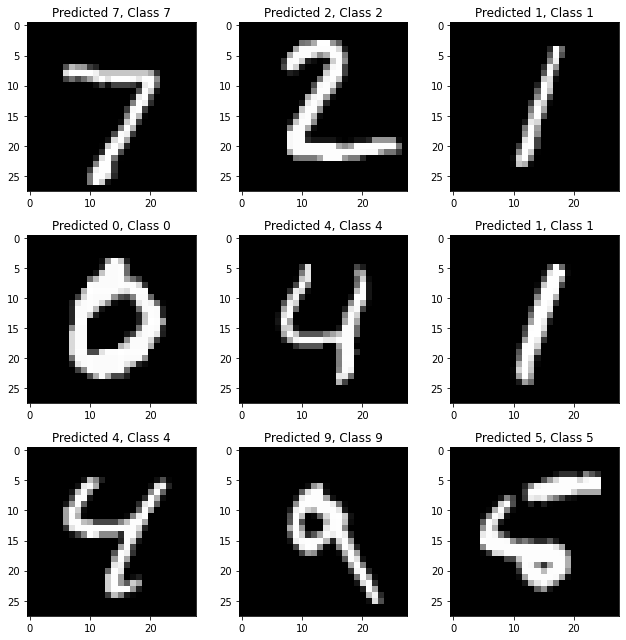

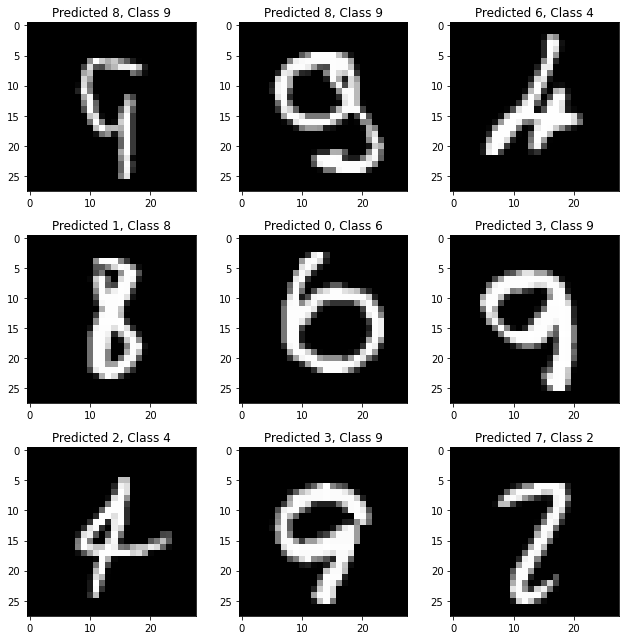

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# Building a "Deep" Convolutional Neural Network


 **step 1:** importing the library.
   * **(ImageDataGenerator)** ---> Keras ImageDataGenerator is used to take the inputs of the original data and then transform it on a random basis, returning the output resultant containing solely the newly changed data.

   * **(Conv2D)**  ---> is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

   *  **(MaxPooling2D)** ---> Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.

   * **(ZeroPadding2D)** ---> . This layer can add rows and columns of zeros at the top, bottom, left and right side of an image tensor.

   *  **(GlobalAveragePooling2D)** ---> Average pooling computes the average of the elements present in the region of feature map covered by the filter.

   * **(Flatten)** ---> Flatten layer is used to make the multidimensional input one-dimensional.

In [23]:
#importing some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization


**Step 2:**  Reload the MNIST data 

In [24]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

**Step 3:**  Except we do not flatten each image into a 784-length vector because we want to perform convolutions first


In [25]:
X_train = X_train.reshape(60000 , 28,28,1)  # reshape 60,000 28 x 28 matrices into ..
X_test = X_test.reshape(10000, 28,28,1)     # reshape 10,000 28 x 28 matrices into ..
                                            # add an additional dimension to represent the single-channel

**Step 4:** change integers to 32-bit floating point numbers

In [26]:
X_train = X_train.astype('float32')  #Change integers to 32-bit floating point
X_test = X_test.astype('float32')

**Step 5:** Normalize each value for each pixel for the entire vector for each input.

* Normailizing using min-max Method

The reason why we normalize each pixel value is neural network learns its weights by continually adding gradient error vectors (multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are passed through.

If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another.

This is non-ideal as we might find ourselves in a oscillating (unable to center onto a better maxima in cost(weights) space) state or in a slow moving (traveling too slow to get to a better maxima) state.

In [27]:
X_train /=255 #normalize each value for each pixel
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


**Step 6:** one-hot format classes

In [28]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

**Step 8: Model Building**

1. We create a sequential object, which is used to simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

In [29]:
model = Sequential()    # Linear stacking of layers

2. Creating the first Convolution Layer, the parameters involved are:
   * filters: To specify the number of feature detectors. Here, we specify it as 32
  * kernal_size: The size of the kernal, in our case it is 3 x 3.
  * input_shape: Here, we specify the order of the input for the first layer.

In [30]:
# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps

3. Applying Batch normalization:
It is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.The normalizing process in batch normalization takes place in batches, not as a single input. The process involved is as follow:

 * Calculate the mean of the hidden activation.
 * Calculate the SD of the hidden activation.

In [31]:
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

4. Now an activation function which is a non-linear function is applied to the output of the layer 1. This activation function checks the output of each node and decides whether the node has fired or not. The activation function used here is 'Rectified Linear Unit (ReLU) it converts all negative inputs to the node in the next layer to be zero. These inputs are then not considered to be fired. The positive values are unchanged.

Explained in deatil in the previous part Method: Without Convolution.

In [32]:
convLayer01 = Activation('relu')  
model.add(convLayer01)   

5. Adding the second Covolution Layer. Here too we have 32 kernals and we would get 32 feature map after the operation. We also perform the batch normalization before the applying the ReLU activation function.

In [33]:
# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps

In [34]:
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

Why do we specifically use ReLU?
The purpose of applying the rectifier function is to increase the non-linearity in our images. The reason we want to do that is that images are naturally non-linear.

When we look at any image, we''ll find it contains a lot of non-linear features (e.g. the transition between pixels, the borders, the colors, etc.).

The rectifier serves to break up the linearity even further in order to make up for the linearity that we might impose an image when we put it through the convolution operation.

In [35]:
model.add(Activation('relu'))                        # activation function used is ReLU

6. **MaxPooling** is applied which downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension. Here, the matrix is of order 2 x 2.

In [36]:
convoLayer02 = MaxPooling2D(pool_size = (2,2))

In [37]:
model.add(convoLayer02)

7. Adding another Convolution layer with 64 kernals, and applying the same steps as before.

In [38]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

8. Adding 4th Convolution layer with 64 kernals, and applying the same steps as before. Finally applying flattening.

In [39]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())

9. Next we create a hidden dense layer with 512 Nodes. Next apply Normalization and then activation function ReLU.

In [40]:
# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))

10.  From the previous layer 20% of neurons are randomly selected and considered not active. This is done to avoid over-fitting.And then we finally create the last output layer, which has 10 nodes. And apply the "softmax" function since we have a multiclass problem (10 categories).

In [41]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

10. By using model.summary(). We get the information about the number of parameters that are involved at each layer. The formula for computing the number of parameters after performing the **Convolution** is 
= ((Dimention of Height * dimension of Width * no. of filters in the previous layer) + 1 (Bias)) * (No of filters in the current layer)

For Eg: 

* For Con2d_4 - Number of parameters are: ((3 * 3 * 1) + 1)*32) = 320
* For Con2d_5 - Number of parameters are: ((3 * 3 * 32) + 1)*32) = 9248

The parameter for the **batch normalization** is: Number of Nodes*4 (Which are the four parameters of BN which are: 

**gamma weights, beta weights, moving_mean(non-trainable) and moving_variance(non-trainable)**

For Eg: 

* 32*4 = 512

Also note: 

* **Total Params** are the total number of parameters in the model.
* **Trainable parameter**s are those parameters which are found using the gradient, when we use batch normalization the parameters Gamma and beta are trained using the gradient but the mean and the variance are not, these are known as **non-trainable parameters**. The number of these parameters could be computed as sum of all the layers of (Total Nodes *2)

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

 **Step 9: Compiling the model**

In [43]:
# we'll use the adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 **Step 10: Fitting the model**

 Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.The various parameters used is:

1. **rotation_range** -  allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.
2. **Random shifts** - It may happen that the object may not always be in the center of the image. To overcome this problem we can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels. It has the argument **height_shift_rang**e for a vertical shift of image and **width_shift_range** for a horizontal shift of image.
3. **zoom_range** - The zoom augmentation either randomly zooms in on the image or zooms out of the image. etc

In [44]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

Performing the transformation in both the train and test data.

In [45]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

Fiting on the train data

In [46]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size
# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, 
                    epochs=5, verbose=1, 
                    validation_data=test_generator,
                    validation_steps= 10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 126s 268ms/step - loss: 0.1276 - accuracy: 0.9598 - val_loss: 0.2387 - val_accuracy: 0.9269
Epoch 2/5
468/468 [==============================] - 127s 272ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 3/5
468/468 [==============================] - 126s 270ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0771 - val_accuracy: 0.9770
Epoch 4/5
468/468 [==============================] - 126s 269ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0285 - val_accuracy: 0.9903
Epoch 5/5
468/468 [==============================] - 126s 269ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0282 - val_accuracy: 0.9914


**Step 11: Evaluating the model**
Finally evaluating the model performance.

In [47]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 26ms/step - loss: 0.0282 - accuracy: 0.9914
Test score: 0.028201211243867874
Test accuracy: 0.9914000034332275
